In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

from citipy import citipy



from config import api_key



In [2]:
#Generate the DataFrame of Random Cities
num_cities = 100
#{'coord': {'lon': , 'lat': }
latitude = np.random.uniform(-90, 90,num_cities)
longitude = np.random.uniform(-180, 180,num_cities)




cities = []
latitude_NS = []
longitude_WE = []
for city in range(0,num_cities):
    near_city = citipy.nearest_city(latitude[city],longitude[city])
    city_name = near_city.city_name 
    cities.append(city_name)
    
    if latitude[city] < 0:
        latitude_NS.append(str(abs(latitude[city])) +'S')
    else:
        latitude_NS.append(str(abs(latitude[city])) + 'N')
    
    if longitude[city] < 0:
        longitude_WE.append(str(abs(longitude[city])) + 'W')
    else:
        longitude_WE.append(str(longitude[city]) + 'E')
        
        
cities_dict = {
    'City': cities,
    'Random Latitude': latitude,
    'Random Longitude': longitude,
    'Latitude_NS': latitude_NS,
    'Longitude_WE': longitude_WE
    
    
}
cities_df = pd.DataFrame(cities_dict)


cities_df.head(20)  


,City,Random Latitude,Random Longitude,Latitude_NS,Longitude_WE
0,taolanaro,-49.852999,60.476241,49.8529991888873S,60.47624110497242E
1,bluff,-88.519008,154.282976,88.51900841756022S,154.28297586164274E
2,kapaa,39.869160,-156.018532,39.869160185447384N,156.01853214386801W
3,rikitea,-64.837382,-119.461178,64.83738233832455S,119.46117761069075W
4,meadow lake,56.467703,-108.127057,56.46770312279625N,108.12705724493289W
5,kirakira,-15.502012,161.198575,15.502011817553054S,161.19857527764253E
6,vylgort,61.351054,50.511110,61.35105359257625N,50.51111048968821E
7,grand river south east,-18.463489,71.156334,18.463489203698842S,71.1563342769694E
8,yirol,7.531386,30.982008,7.531385518980116N,30.98200845859688E
9,grand gaube,-15.497284,65.464937,15.497284184738092S,65.46493702450624E


In [3]:
# Save config information

#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'imperial'
cities = cities_df['City']
city = "Cape Town"

# Build query URL
#query_url = url + 'lat=' + latitud + '&lon=' + longitud + "&appid=" + api_key + "&units=metric"

query_url = url + 'q=' + city + '&appid=' + api_key + '&units=metric'

#Series that contains every 
cities_url = url + 'q=' + cities_df['City'] + '&appid=' + api_key + '&units=' + units




cities_df




,City,Random Latitude,Random Longitude,Latitude_NS,Longitude_WE
0,taolanaro,-49.852999,60.476241,49.8529991888873S,60.47624110497242E
1,bluff,-88.519008,154.282976,88.51900841756022S,154.28297586164274E
2,kapaa,39.869160,-156.018532,39.869160185447384N,156.01853214386801W
3,rikitea,-64.837382,-119.461178,64.83738233832455S,119.46117761069075W
4,meadow lake,56.467703,-108.127057,56.46770312279625N,108.12705724493289W
...,...,...,...,...,...
95,atbasar,50.305903,68.650158,50.30590316131125N,68.6501577239062E
96,duluth,46.954505,-91.069389,46.95450452536511N,91.0693886569163W
97,faanui,-15.401806,-155.439174,15.401806443783826S,155.4391741992181W
98,ballina,-30.461486,159.088806,30.461485530055114S,159.08880551732256E


In [4]:
# Get weather data
#weather_response = requests.get(query_url) #requests.models.Response
#weather_json = weather_response.json() #dict
#city_coord = weather_json['coord'] #dict
#city_coord

# Series with all the responses
cities_Response = cities_url.apply(requests.get) #pandas.core.series.Series requests.models.Response
print(cities_Response)


cities_Response[5].json()


0     <Response [404]>
1     <Response [200]>
2     <Response [200]>
3     <Response [200]>
4     <Response [200]>
            ...       
95    <Response [200]>
96    <Response [200]>
97    <Response [200]>
98    <Response [200]>
99    <Response [200]>
Name: City, Length: 100, dtype: object


{'coord': {'lon': 161.9205, 'lat': -10.4544},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 85.44,
  'feels_like': 92.55,
  'temp_min': 85.44,
  'temp_max': 85.44,
  'pressure': 1010,
  'humidity': 67,
  'sea_level': 1010,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 2.86, 'deg': 2, 'gust': 4.63},
 'clouds': {'all': 25},
 'dt': 1619488734,
 'sys': {'country': 'SB', 'sunrise': 1619464605, 'sunset': 1619506979},
 'timezone': 39600,
 'id': 2178753,
 'name': 'Kirakira',
 'cod': 200}

In [5]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

temp = []
lat = []
humidity = []
cloudiness = []
wind = []
city_name = []

for n in range(0,len(cities_Response)):
    response = cities_Response[n].json()
    if response['cod'] == '404':
        temp.append(None)
        lat.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind.append(None)
        city_name.append(None)
    else:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_name.append(response['name'])
        
        

dict = {
    'City' : city_name,
    'Temperature': temp,
    'Latitude': lat,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Sped (mph)': wind
}

plot_df_na = pd.DataFrame(dict)
plot_df = plot_df_na.dropna(how = 'all')
plot_df

,City,Temperature,Latitude,Humidity,Cloudiness,Wind Sped (mph)
1,Bluff,48.99,-46.6000,66.0,85.0,7.00
2,Kapaa,75.09,22.0752,69.0,1.0,9.22
3,Rikitea,78.13,-23.1203,72.0,100.0,6.98
4,Meadow Lake,72.75,34.8014,8.0,75.0,13.80
5,Kirakira,85.44,-10.4544,67.0,25.0,2.86
...,...,...,...,...,...,...
95,Atbasar,50.95,51.8000,82.0,100.0,5.79
96,Duluth,35.51,46.7833,93.0,90.0,18.41
97,Faanui,81.25,-16.4833,68.0,69.0,4.88
98,Ballina,71.58,-28.8667,64.0,40.0,12.66


In [6]:
#Divide the Data Between Norther and Southern Hemispher
northern = plot_df.loc[plot_df['Latitude']>= 0,:]
southern = plot_df.loc[plot_df['Latitude']< 0,:]

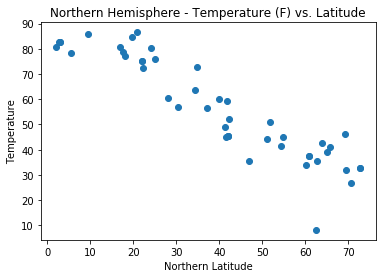

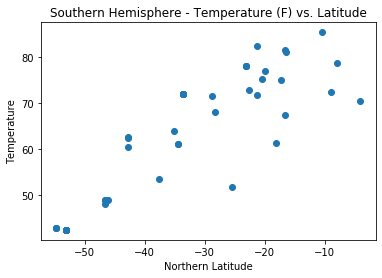

In [7]:
plt.scatter(x = northern['Latitude'],y =northern['Temperature'] )
plt.xlabel('Northern Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.show()

plt.scatter(x = southern['Latitude'],y =southern['Temperature'] )
plt.xlabel('Northern Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.show()